# How High can I Get
My attempt at extracting height information from print footage of the 3DPMD DED process.

In [2]:
# importing required packages
from utils import utils
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from myfuncs import funcs
import cv2 as cv
import ffmpeg


## Loading Images

In [42]:
im1 = cv.imread('Images/Inputs/sideview/SIDEVIEW1_20241008-164916506387-0001.png', cv.IMREAD_GRAYSCALE) 
im2 = cv.imread('Images/Inputs/sideview/SIDEVIEW1_20241008-164916506387-0002.png', cv.IMREAD_GRAYSCALE)
im1 = cv.normalize(im1, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
im2 = cv.normalize(im2, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)

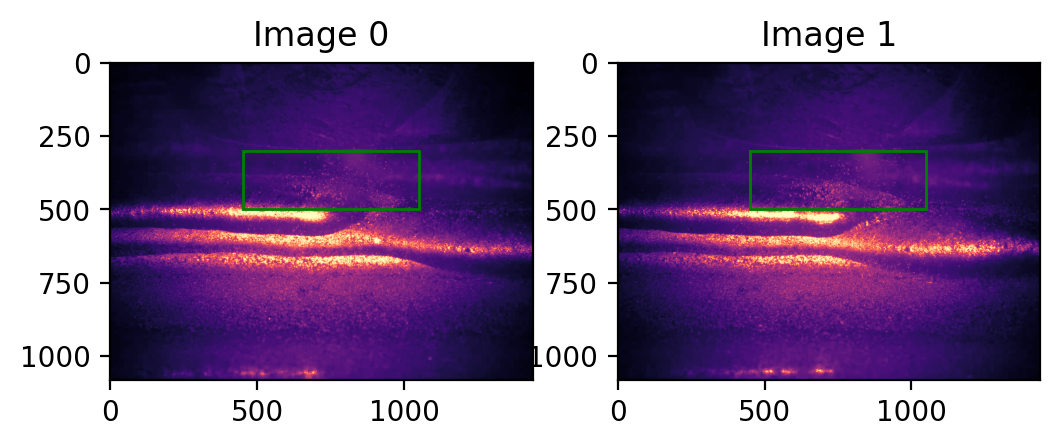

In [43]:
# display images
image_plots = [im1, im2]

fig, axs = plt.subplots(1, 2, figsize=(6,3), dpi=200)
for i, img in enumerate(image_plots):
    axs[i].imshow(img, cmap='magma')
    axs[i].set_title('Image ' + str(i))
    axs[i].add_patch(plt.Rectangle((450,500), 600, -200, edgecolor='green', facecolor='none', lw=1))
    #axs[i].set_axis_off()


In [62]:
def remove_highlights(image, threshold=60, type=cv.THRESH_BINARY):
    _, highlights = cv.threshold(image, threshold, 255, type)
    return highlights


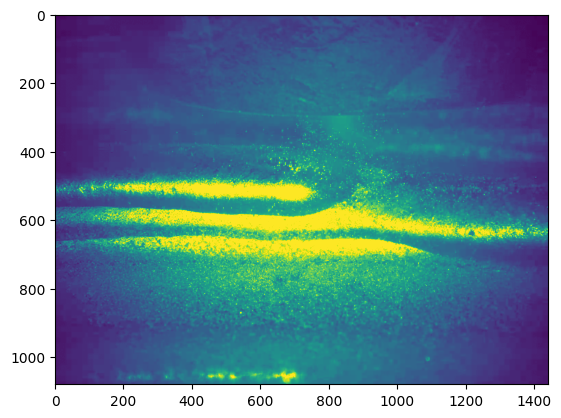

In [73]:
plt.imshow(remove_highlights(im1, threshold=150, type=cv.THRESH_TRUNC))

Note that for each of the image, the main ROI has a few sub-ROIs:

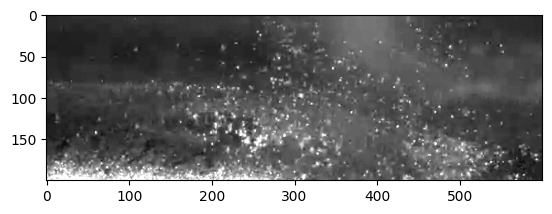

In [74]:
im1_trunc = remove_highlights(im1, threshold=150, type=cv.THRESH_TRUNC)
ROI_1 = im1_trunc[300:500, 450:1050]
plt.imshow(ROI_1, cmap='grey')

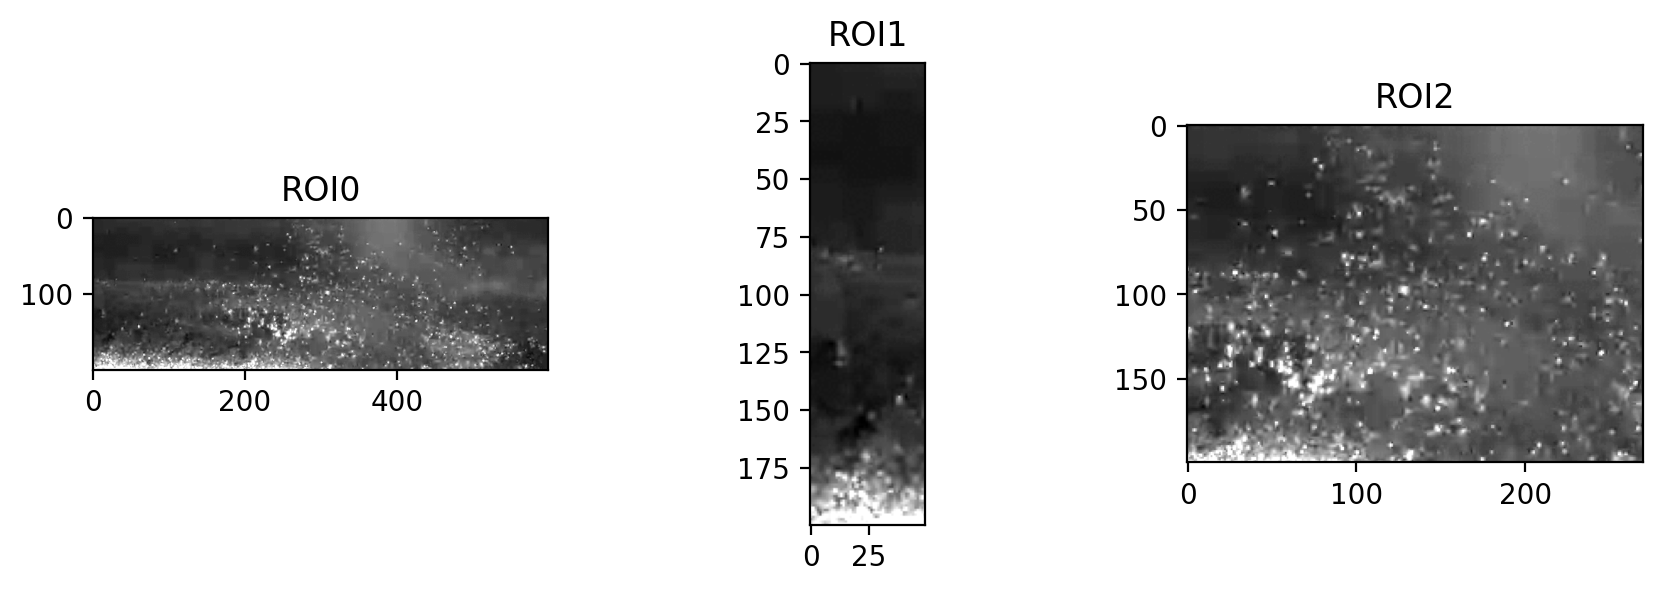

In [83]:
ROI_trail_1 = ROI_1[0:200, 0:50]
ROI_head_1 = ROI_1[0:200, 180:450]

ROI_plots = [ROI_1, ROI_trail_1, ROI_head_1]

# plot the three ROIs
fig, axs = plt.subplots(1, 3, figsize=(10,3), dpi=200)
for i, img in enumerate(ROI_plots):
    axs[i].set_title('ROI'+ str(i))
    #axs[i].set_axis_off()
    axs[i].imshow(img, cmap='grey')



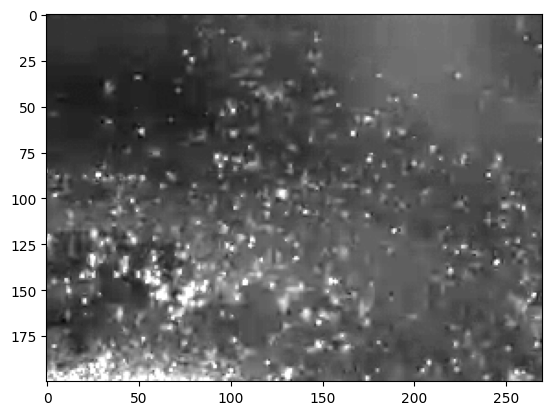

In [76]:
plt.imshow(cv.normalize(ROI_head_1, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX), cmap='grey')


# 